In [32]:
import numpy as np
import predictthumb, perfect, pooled, predictthumbGP, averageoffset
reload(predictthumb)
reload(perfect)
reload(pooled)
reload(predictthumbGP)
reload(averageoffset)

noregr = []
pool = []
perf = []
pred = []
predGP = []
averGP = []

pool_mse = np.zeros((15,4))
perf_mse = np.zeros((15,4))
pred_mse = np.zeros((15,4))
predGP_mse = np.zeros((15,4))
averGP_mse = np.zeros((15,4))

for i in range(3,18):
    print ("Processing user %d" %i)
    
    before, after, b_x, b_y, a_x, a_y = predictthumb.run(i)
    pred.append(after[1])
    pred_mse[i-3] = np.array([b_x, b_y, a_x, a_y])
    
    before, after, b_x, b_y, a_x, a_y = pooled.run(i)
    pool.append(after[1])
    pool_mse[i-3] = np.array([b_x, b_y, a_x, a_y])
    
    before, after, b_x, b_y, a_x, a_y = predictthumbGP.run(i)
    predGP.append(after[1])
    predGP_mse[i-3] = np.array([b_x, b_y, a_x, a_y])
    
    before, after, b_x, b_y, a_x, a_y = perfect.run(i)
    perf.append(after[1])
    noregr.append(before[1])
    perf_mse[i-3] = np.array([b_x, b_y, a_x, a_y])
    
    before, after, b_x, b_y, a_x, a_y = averageoffset.run(i)
    averGP.append(after[1])
    averGP_mse[i-3] = np.array([b_x, b_y, a_x, a_y])

print "###################"    
print "Processing Complete"    

Processing user 3
Processing user 4
Processing user 5
Processing user 6
Processing user 7
Processing user 8
Processing user 9
Processing user 10
Processing user 11
Processing user 12
Processing user 13
Processing user 14
Processing user 15
Processing user 16
Processing user 17
###################
Processing Complete


##Touches within 2mm virtual button##

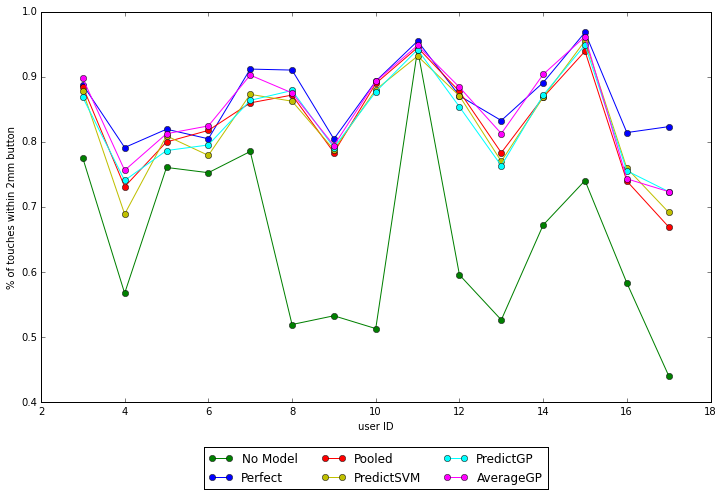

In [42]:
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize=(12, 7))

plt.errorbar(range(3,18), noregr, marker='o', color ='g', label='No Model')
plt.errorbar(range(3,18), perf, marker='o', color = 'b', label='Perfect')
plt.errorbar(range(3,18), pool, marker='o', color='r', label='Pooled')
plt.errorbar(range(3,18), pred, marker='o', color = 'y', label='PredictSVM')
plt.errorbar(range(3,18), predGP, marker='o', color='cyan', label='PredictGP')
plt.errorbar(range(3,18), averGP, marker='o', color='magenta', label='AverageGP')

plt.legend(loc='best')
plt.xlabel('user ID')
plt.ylabel('% of touches within 2mm button')
plt.legend(loc=9, bbox_to_anchor=(0.5, -0.1), ncol=3)
#plt.savefig('/users/level5/1005056p/Desktop/Latex/L5Project/mpaper/img/overall.png', bbox_inches='tight', dpi=400)
plt.show()

##Only thumb prediction models##

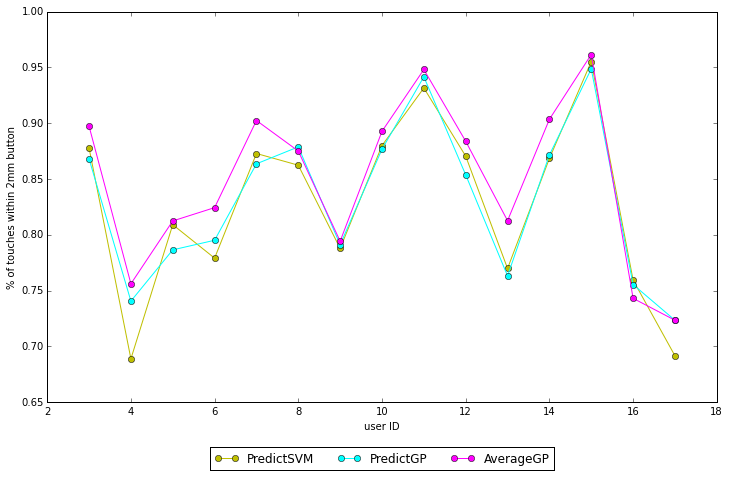

In [39]:
fig = plt.figure(figsize=(12, 7))

plt.errorbar(range(3,18), pred, marker='o', color = 'y', label='PredictSVM')
plt.errorbar(range(3,18), predGP, marker='o', color='cyan', label='PredictGP')
plt.errorbar(range(3,18), averGP, marker='o', color='magenta', label='AverageGP')

plt.legend(loc='best')
plt.xlabel('user ID')
plt.ylabel('% of touches within 2mm button')
plt.legend(loc=9, bbox_to_anchor=(0.5, -0.1), ncol=3)
#plt.savefig('/users/level5/1005056p/Desktop/Latex/L5Project/mpaper/img/overall_pred.png', bbox_inches='tight', dpi=400)

plt.show()

##MSE table##

In [45]:
pred_a = pred_mse[:,[2,3]]
pool_a = pool_mse[:,[2,3]]
predGP_a = predGP_mse[:,[2,3]]
averGP_a = averGP_mse[:,[2,3]]

np.set_printoptions(precision=2)
table = np.concatenate((perf_mse, pool_a, pred_a, predGP_a, averGP_a),1)
print table

[[ 133.37  103.2    80.49   90.56   77.97  103.07   79.94  100.43   78.53
   102.52   78.19   99.52]
 [ 193.69  204.55  125.34  113.6   133.72  144.33  135.85  157.05  131.94
   133.22  126.79  129.46]
 [  89.59  189.68   82.17  149.32   81.5   148.68   84.01  151.93   85.88
   158.49   80.66  148.64]
 [ 114.52  139.14   81.73  139.99   90.63  139.25   96.39  138.66   94.93
   141.47   88.12  140.26]
 [  93.34  133.94   59.57   77.88   63.24  124.1    66.52  107.66   66.73
   107.13   62.6   101.08]
 [ 310.01  132.02   57.96  104.29   65.87  121.14   60.81  135.05   63.32
   120.84   62.65  117.7 ]
 [ 248.49  213.72   89.05  137.16   90.22  142.96   90.18  155.2    94.9
   150.92   90.9   143.44]
 [ 313.93  141.34   59.13  118.91   63.31  115.97   65.1   118.3    66.74
   116.46   62.26  115.49]
 [  91.84   75.37   79.39   69.65   77.37   70.77   80.42   69.89   81.17
    70.74   78.39   67.33]
 [ 315.34   94.02   90.53   88.4    95.49   89.05   91.98   92.82   93.76
    98.44   91.7  

##MSE table average##

In [46]:
print np.mean(table, 0)

[ 202.4   155.12   81.67  110.4    87.08  131.22   89.18  134.01   89.05
  131.54   85.03  124.05]
